In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./full_client.xlsx")

In [3]:
pd.set_option('display.max_rows', 750)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             687 non-null    int64  
 1   name_user      685 non-null    object 
 2   phone          687 non-null    object 
 3   name_1         678 non-null    object 
 4   phone_1        687 non-null    int64  
 5   name_2         24 non-null     object 
 6   phone_2        88 non-null     float64
 7   name_3         9 non-null      object 
 8   phone_3        7 non-null      float64
 9   city           687 non-null    object 
 10  addres         677 non-null    object 
 11  kids           649 non-null    object 
 12  status         680 non-null    object 
 13  source         247 non-null    object 
 14  call_16_17     273 non-null    object 
 15  ages_16_17     231 non-null    object 
 16  avg_age_16_17  231 non-null    float64
 17  call_17_18     350 non-null    object 
 18  ages_17_18

## Анализ статус клиента на последние время

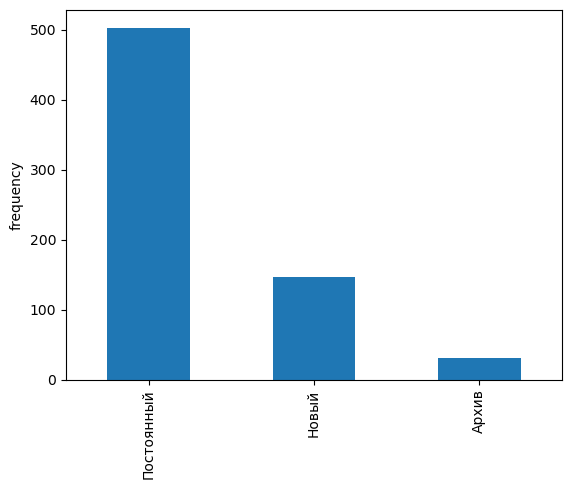

In [5]:
df['status'].value_counts().plot(kind='bar', ylabel='frequency')
plt.show()

## Исправление статуса "Архив" 

Из графика выше видно, что много постоянных клиентов, но в это мало вериться так как возраст детей не менялся, но мы расчитали их возраст при подготовки данных

Проверим средний возраст по гистограмме, исходя от нее изменим статус

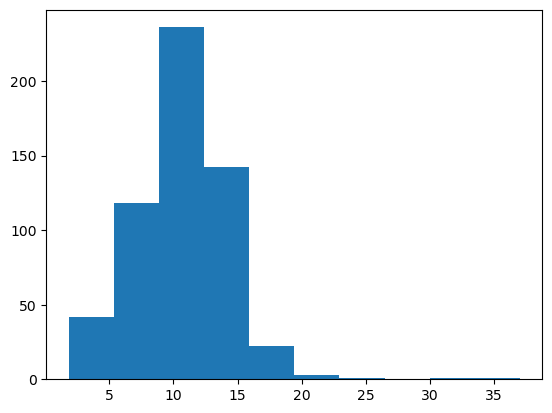

In [6]:
plt.hist(df['avg_age_23_24'])
plt.show()

Дополнительно к графику сделаем фильтацию по значению для проверки с какого возраста лучше переносить клиента в архив, по опыту работы актером дети примерно с 10-12 лет уже не верят в Деда Мороза

In [34]:
df[(df['avg_age_23_24'] <= 14.0) & (df['avg_age_23_24'] >= 12.0)][['status','ages_23_24','avg_age_23_24']].head()

,status,ages_23_24,avg_age_23_24
0,Постоянный,"[17.0, 13.0, 8.5]",12.83
5,Архив,[12.0],12.00
6,Архив,[13.0],13.00
8,Архив,[14.0],14.00
9,Постоянный,"[12.5, 12.5]",12.50


После анализа в промежутке фильтрации принято решение перенести в архив со среднего возраста 13.5, потому что ниже этого значения встречаются дети с возрастом меньше 10 лет

Так же просмотрим выбросы где большой средний возраст 

In [8]:
df[df['avg_age_23_24'] >= 20][['status','ages_23_24','avg_age_23_24']]

,status,ages_23_24,avg_age_23_24
161,Постоянный,"[13.0, 62.0, 10.0, 19.0, 12.0]",23.2
206,Постоянный,"[22.0, 22.0]",22.0
266,Постоянный,"[15.0, 27.0, 54.0]",32.0
329,Постоянный,"[9.0, 10.0, 44.0]",21.0
448,Постоянный,[37.0],37.0


Клиента с id 329 выделяем

Изменяем значение 'Архив'

In [9]:
df.loc[(df['avg_age_23_24'] >= 13.5) & (df['id'] != 329), 'status'] = 'Архив'

## Исправление статуса "Новый" 

In [33]:
df[df['status'] == 'Новый'][['status', 'call_16_17', 'call_17_18', 'call_18_19', 'call_19_20', 
                             'call_20_21', 'call_21_22', 'call_22_23', 'call_23_24']].head()

,status,call_16_17,call_17_18,call_18_19,call_19_20,call_20_21,call_21_22,call_22_23,call_23_24
523,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
524,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
525,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
526,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
568,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,Заказал


Изменяем все значения "Новый" на "Постоянный" для упращения вывода новых клиентов

In [11]:
df.loc[df['status'] == 'Новый', 'status'] = 'Постоянный'

In [32]:
df[( (df['call_22_23'].notnull()) | (df['call_23_24'].notnull()) )
   
   & ( (df['call_16_17'].isnull()) & (df['call_17_18'].isnull()) & (df['call_18_19'].isnull())
      & (df['call_19_20'].isnull()) & (df['call_20_21'].isnull()) & (df['call_21_22'].isnull())
     
   & (df['status'] != 'Архив')  
     )
     
  ][['status', 'call_16_17', 'call_17_18', 'call_18_19', 'call_19_20', 
     'call_20_21', 'call_21_22', 'call_22_23', 'call_23_24']].head()

,status,call_16_17,call_17_18,call_18_19,call_19_20,call_20_21,call_21_22,call_22_23,call_23_24
523,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
524,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
525,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
526,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,NaN
568,Новый,NaN,NaN,NaN,NaN,NaN,NaN,Заказал,Заказал


Изменяем значение на 'Новый', где клиент заказывает только последние 2 года 

In [13]:
df.loc[( (df['call_22_23'].notnull()) | (df['call_23_24'].notnull()) )
   
   & ( (df['call_16_17'].isnull()) & (df['call_17_18'].isnull()) & (df['call_18_19'].isnull())
      & (df['call_19_20'].isnull()) & (df['call_20_21'].isnull()) & (df['call_21_22'].isnull())
     
   & (df['status'] != 'Архив')  
     )
     
  ,'status'] = 'Новый'

## Анализ по количеству заказов 

In [14]:
df.value_counts('number_orders')

number_orders
1    367
2    120
0     74
3     66
4     32
5     14
6      7
7      7
dtype: int64

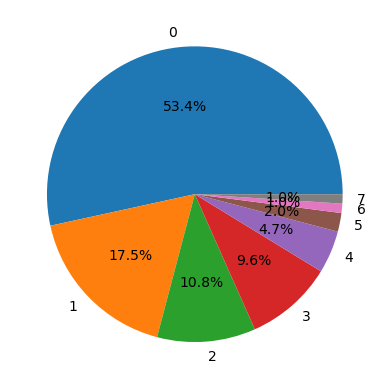

In [15]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]

plt.pie(df.value_counts('number_orders'), labels=labels, autopct='%1.1f%%')
plt.show()

In [31]:
# df[df['number_orders'] == 0]

Видим что количество заказов = 0, очень старые клиенты, их тоже перемещаем в архив

In [17]:
df.loc[df['number_orders'] == 0, 'status'] = 'Архив'

После изменениея статусов проверяем что получается, так же выводим в процентном соотношение

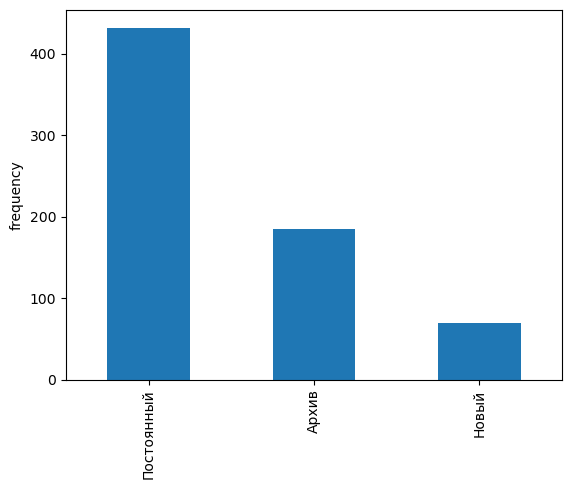

In [18]:
df['status'].value_counts().plot(kind='bar', ylabel='frequency')
plt.show()

In [19]:
df.groupby('status').size() / len(df) * 100

status
Архив         26.928675
Новый         10.043668
Постоянный    62.882096
dtype: float64

In [20]:
df.groupby('status').size()

status
Архив         185
Новый          69
Постоянный    432
dtype: int64

#### Итог по статусу - для существование бизнеса постоянных клиентов достаточно, но при этом нужно задумать о новых клиентов , что бы их состав был хотя бы 30%

## Анализ источника клиента

In [21]:
df['source'].unique()

array([nan, 'Интернет', 'Рекомендация', 'Листовки', 'Вконтакте',
       'Знакомые', 'Инстаграмм', 'Газета', 'Объявление', 'Машина',
       'Визитка', 'Конкурс', 'Авито'], dtype=object)

In [22]:
df['source'].value_counts()

Интернет        102
Рекомендация     32
Знакомые         30
Вконтакте        23
Инстаграмм       20
Авито            16
Конкурс           8
Листовки          5
Объявление        4
Машина            3
Газета            2
Визитка           2
Name: source, dtype: int64

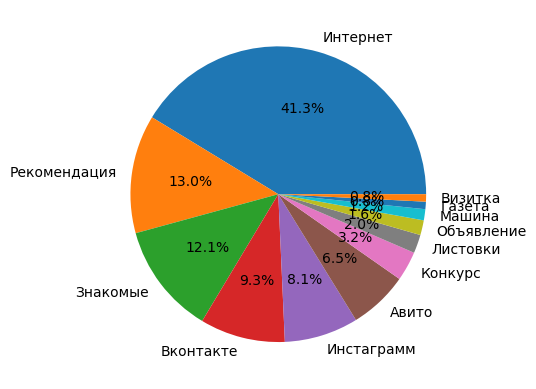

In [23]:
labels = ['Интернет', 'Рекомендация', 'Знакомые', 'Вконтакте', 'Инстаграмм', 'Авито', 'Конкурс', 
          'Листовки', 'Объявление', 'Машина', 'Газета', 'Визитка']

plt.pie(df.value_counts('source'), labels=labels, autopct='%1.1f%%')
plt.show()

#### Итог по источникам - больше всего клиентов приходит:

* рекламы в интеренте 
* рекламы в ВК 
* рекламы в инстаграмм 
* рекламы в рекомендации 
* рекламы в авито

Остальными можно не заниматься, либо тратить не так много денег 

## Анализ города клиента

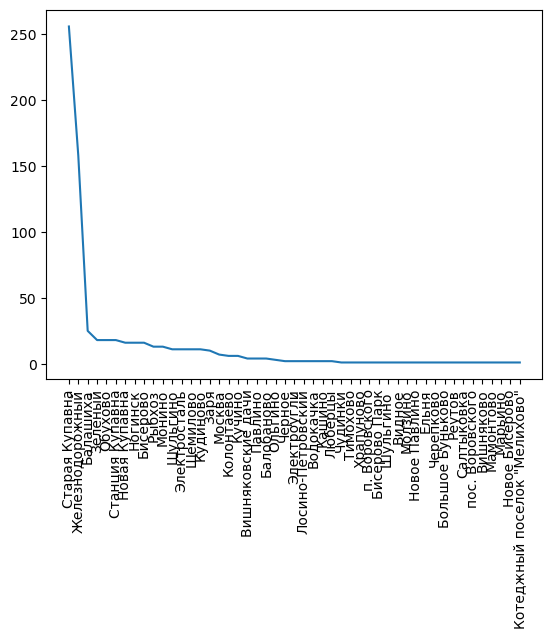

In [24]:
plt.plot(df['city'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [25]:
df[(df['city'] == 'Старая Купавна') | (df['city'] == 'Железнодорожный') 
   | (df['city'] == 'Балашиха')].groupby('city').size() / len(df) * 100

city
Балашиха            3.639010
Железнодорожный    22.998544
Старая Купавна     37.263464
dtype: float64

#### Итог по городам - больше всего клиентов:

* рекламы в Старая Купавна 
* рекламы в Железнодорожный 
* рекламы в Балашиха 

Само собой понятно что Старая Купавна основной город, но лучше увеличить рекламу и цены в Железнодорожном что бы повысить количество клиентов там, Балашиха не так пока что важна

## Анализ по количеству заказов исключая сторых клиентов 

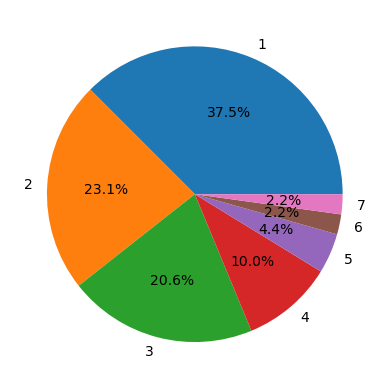

In [26]:
labels = [1, 2, 3, 4, 5, 6, 7]

plt.pie(df.value_counts('number_orders')[1:], labels=labels, autopct='%1.1f%%')
plt.show()

In [30]:
df[(df['status'] == 'Постоянный') & ((df['number_orders'] == 1) | (df['number_orders'] == 2))
    ][['status', 'call_16_17', 'call_17_18', 'call_18_19', 'call_19_20', 
     'call_20_21', 'call_21_22', 'call_22_23', 'call_23_24', 'number_orders', 'avg_age_23_24']].head()

,status,call_16_17,call_17_18,call_18_19,call_19_20,call_20_21,call_21_22,call_22_23,call_23_24,number_orders,avg_age_23_24
0,Постоянный,Заказал,Не будут(в этом году),NaN,NaN,NaN,NaN,NaN,NaN,1,12.83
1,Постоянный,Заказал,Заказал,NaN,NaN,NaN,NaN,NaN,NaN,2,11.00
2,Постоянный,Заказал,Заказал,NaN,NaN,NaN,NaN,NaN,NaN,2,11.50
3,Постоянный,NaN,Заказал,NaN,NaN,NaN,NaN,NaN,NaN,1,9.00
9,Постоянный,Заказал,Не будут(в этом году),NaN,NaN,NaN,NaN,NaN,NaN,1,12.50


#### Итог по по количеству заказов исключая сторых клиентов:

В основном до 4 заказов на одного клиента, что считается нормой, потому что заказы идут от 4-5 лет до 10-12 так же учитываем что закаказывают не каждый год подряд, потому что либо заболели, либо уехали

Но стоит учесть, что соотношение 1-2 заказов намного больше чем "Новых" клиентов => что "Постоянные" клиенты заказывали по 1 разу, к сожалению нет данных с оценками - на основе их приблизительно можно было бы выяснить почему так прозошло

In [36]:
df.to_excel("./full_client_v.xlsx")